In [1]:
import qomparator as qmp
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister

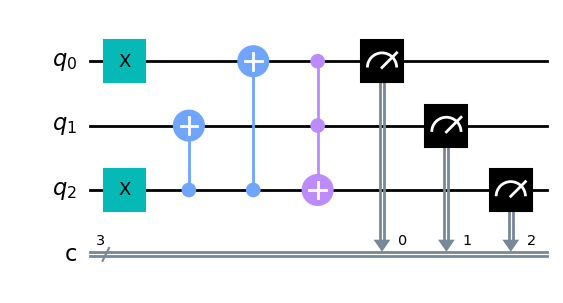

In [2]:
qr = QuantumRegister(3, "q")
cr = ClassicalRegister(3, "c")
circuit = QuantumCircuit(qr, cr)

circuit.x(qr[0])  # c
# circuit.x(qr[1])  # b
circuit.x(qr[2])  # a
circuit.append(qmp.majority(), qr)
circuit.measure(qr, cr)

circuit.decompose("MAJ").draw('mpl', scale=1)

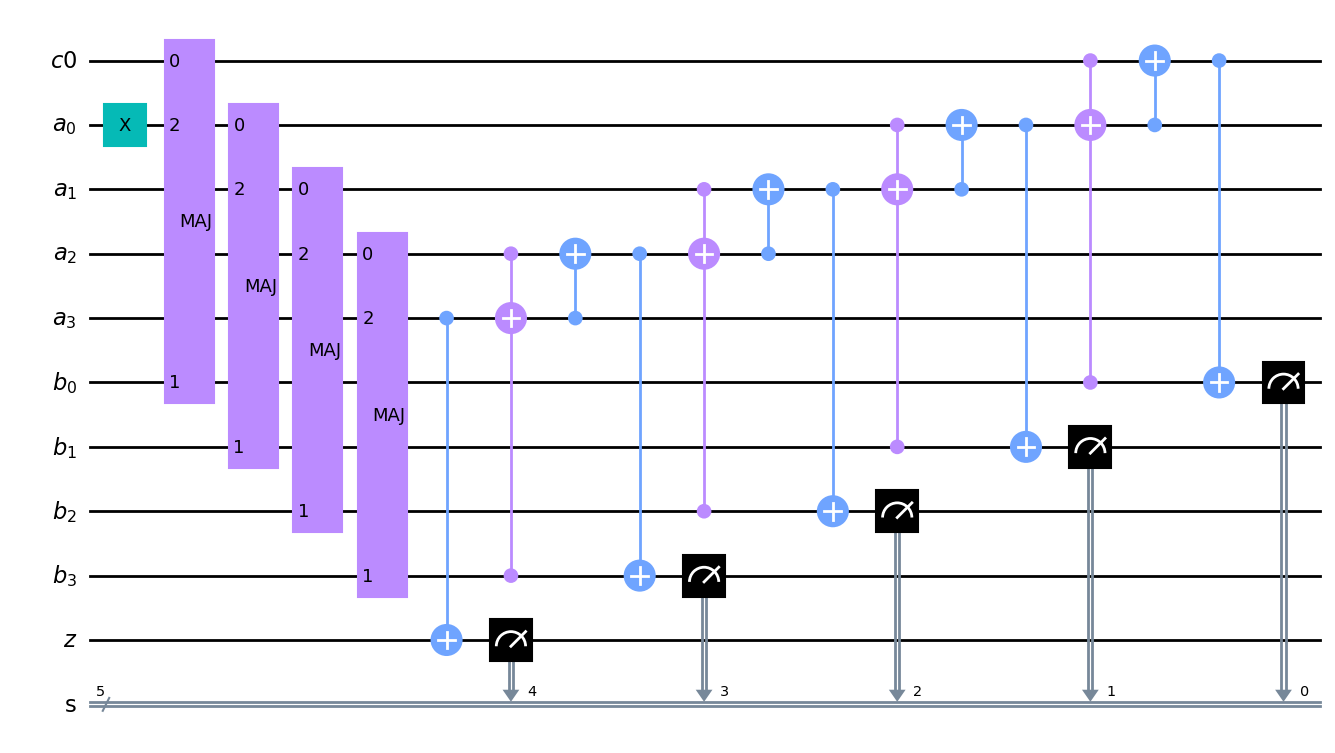

In [4]:
nbits = 4
c0 = QuantumRegister(1, name='c0')
a = QuantumRegister(nbits, name='a')
b = QuantumRegister(nbits, name='b')
z = QuantumRegister(1, name='z')
cr = ClassicalRegister(5, name='s')
circuit = QuantumCircuit(c0, a, b, z, cr)

circuit.append(qmp.qubits_from_integer(nbits, 1), a)
circuit.append(qmp.qubits_from_integer(nbits, 0), b)
circuit.append(qmp.adder(nbits), [c0[0]] + a[:] + b[:] + z[:])
circuit.measure(b[:] + z[:], cr)

circuit.decompose(["INT", "ADD"]).decompose("UMA").draw('mpl', scale=1)